# Electric field normalization

In [1]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          TRAIN_COMPLEX_FIELDS_PREFIX, \
                          VALIDATION_COMPLEX_FIELDS_PATH, \
                          TEST_COMPLEX_FIELDS_PATH, \
                          FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX, \
                          FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH, \
                          FC_PROCESSED_TEST_COMPLEX_FIELDS_FILE_PATH, \
                          SUBFILE_SAMPLES, \
                          COMPLEX_NUMBER_NORMALIZATION_CONSTANT

from data_utils import normalize_data, \
                       save_numpy_array

import numpy as np

#from plot_utils import plot_amplitude_phase_intensity_from_complex_field

In [9]:
def process_fc_complex_field(filepath):
    
    complex_arrays = np.load(filepath)

    complex_arrays = complex_arrays/COMPLEX_NUMBER_NORMALIZATION_CONSTANT
    real_part = np.real(complex_arrays).astype(np.float32)
    imaginary_part = np.imag(complex_arrays).astype(np.float32)
    
    processed_complex_field_arrays = np.stack((real_part, imaginary_part), axis=1)
    processed_complex_field_arrays = processed_complex_field_arrays.reshape((1, 128*128*2))    
    return processed_complex_field_arrays

In [10]:
for train_file in PSF_TRAIN_FILE_SUFFIXES:
    filepath = f"{TRAIN_COMPLEX_FIELDS_PREFIX}{train_file}{NUMPY_SUFFIX}"
    processed_complex_field_arrays = process_fc_complex_field(filepath)

    save_numpy_array(processed_complex_field_arrays,
                    f"{FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX}{train_file}{NUMPY_SUFFIX}")


In [11]:
processed_complex_field_arrays = process_fc_complex_field('./a3.npy')
save_numpy_array(processed_complex_field_arrays,
                 './a3_processed.npy')

In [1]:
import numpy as np
a = np.load('../Training/a3_processed.npy')

In [2]:
a.max()

1.2594949

In [3]:
a.min()

-2.7634661

In [12]:
processed_complex_field_arrays = process_fc_complex_field(TEST_COMPLEX_FIELDS_PATH)

save_numpy_array(processed_complex_field_arrays,
                 FC_PROCESSED_TEST_COMPLEX_FIELDS_FILE_PATH)

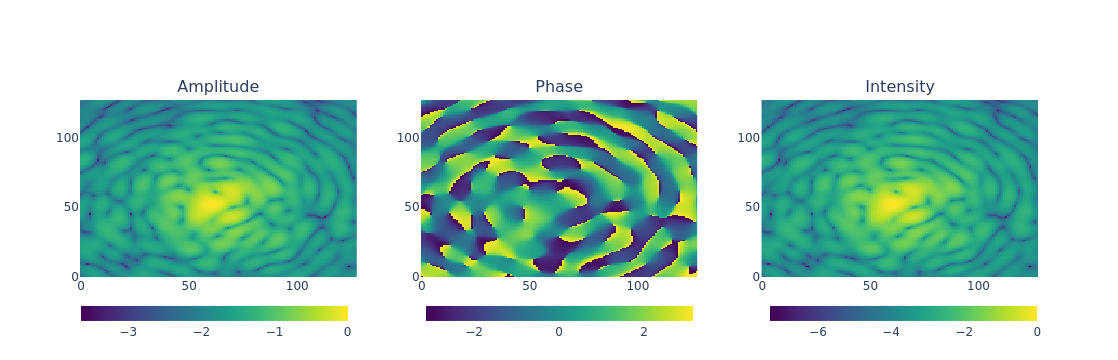

In [13]:
cfs = np.load(FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH)
cf = cfs[2].reshape(2, 128, 128)
cf = cf[0] + 1j*cf[1]
plot_amplitude_phase_intensity_from_complex_field(cf)

# Output fluxes normalization

In [1]:
from psf_constants import NUMPY_SUFFIX, \
                          PSF_TRAIN_FILE_SUFFIXES, \
                          TRAIN_OUTPUT_FLUXES_FILE_PREFIX, \
                          VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          TEST_OUTPUT_FLUXES_FILE_PATH, \
                          FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX, \
                          FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          FC_PROCESSED_TEST_OUTPUT_FLUXES_FILE_PATH, \
                          SUBFILE_SAMPLES

from data_utils import normalize_data, \
                       save_numpy_array

import numpy as np

In [2]:
def process_output_fluxes(filepath):
    output_fluxes = np.load(filepath)
    #norm_fluxes, scaler = normalize_data(output_fluxes)
    
    #return norm_fluxes
    return output_fluxes

In [3]:
print(PSF_TRAIN_FILE_SUFFIXES[2])

02


In [4]:
for train_file in PSF_TRAIN_FILE_SUFFIXES:
    print(train_file)
    filepath = f"{TRAIN_OUTPUT_FLUXES_FILE_PREFIX}{train_file}{NUMPY_SUFFIX}"
    processed_output_fluxes_arrays = process_output_fluxes(filepath)

    save_numpy_array(processed_output_fluxes_arrays,
                    f"{FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX}{train_file}{NUMPY_SUFFIX}")

00
01
02
ERROR: /home/dani/DaniProjects/SAIL/PhotonicLanternProjects/Data/PSFReconstruction/ProcessedOutputFluxes/TrainData/fc_output_fluxes02.npy already exists.
03
04
05
06


In [4]:
processed_output_fluxes_arrays = process_output_fluxes(VALIDATION_OUTPUT_FLUXES_FILE_PATH)

save_numpy_array(processed_output_fluxes_arrays,
                 FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH)

In [5]:
processed_output_fluxes_arrays = process_output_fluxes(TEST_OUTPUT_FLUXES_FILE_PATH)

save_numpy_array(processed_output_fluxes_arrays,
                 FC_PROCESSED_TEST_OUTPUT_FLUXES_FILE_PATH)